A convolutional neural network classification on fashin mnist dataset with 91.6% accuracy

1-importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [17]:
#determining the shape of train and test dataset
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


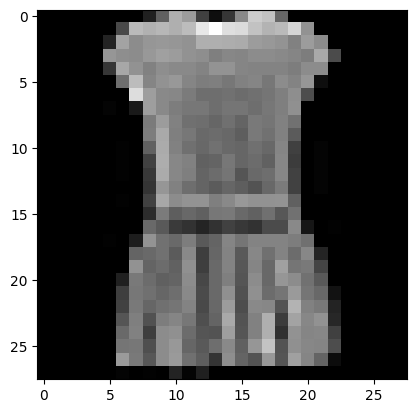

In [16]:
plt.imshow(x_train[3,],cmap="gray")

In [5]:
y_train
#this shows that our dataset has 10 different classes

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

2-Starting the model creation

In [11]:
#on my previous code i used add function and added the layers one by one so i thought i use a different method this time in creating the Sequential model
#The Conv2D layer performs a convolution operation on the input data by sliding each filter over the input data spatially
#computing the dot product between the filter weights and the corresponding input pixel values at each position
#This produces a feature map that highlights certain patterns or features in the input data. Multiple filters can be applied to the same input data
#resulting in multiple feature maps that capture different aspects of the input.
#Conv2D(64,6,activation,input_shape),from left to right,64 is the number of filters used,6 is the size of the filter,Selu is the used activation function for its overall perfromance
#padding is a function that helps either reducing the size of the feature map(padding="valid"),or making sure it has the same spatial dimension(padding="same"),and input shape is the shape of data
model=keras.models.Sequential([
    keras.layers.Conv2D(64,6,activation="selu",padding="same",input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,activation="selu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64,3,activation="selu"),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation="selu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(350,activation="selu"),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(225,activation="selu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100,activation="selu"),
    keras.layers.Dropout(0.35),
    keras.layers.Dense(10,activation="softmax")


])

In [12]:
#over the course of this project i've found out that slightly increasing the LR from 0.001 to 0.005 helps the stability of network and reduces overfitting to an extent
tuned_adamax=tf.keras.optimizers.Adamax(learning_rate=0.005)

In [13]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=tuned_adamax,
    metrics=["accuracy"]
    )

In [14]:
mod_res=model.fit(x_train,y_train,epochs=30,batch_size=50,validation_split=0.2)

Epoch 1/30
960/960 [==============================] - 150s 154ms/step - loss: 1.0839 - accuracy: 0.6994 - val_loss: 0.4558 - val_accuracy: 0.8382
Epoch 2/30
960/960 [==============================] - 146s 152ms/step - loss: 0.5152 - accuracy: 0.8253 - val_loss: 0.3761 - val_accuracy: 0.8602
Epoch 3/30
960/960 [==============================] - 151s 157ms/step - loss: 0.4246 - accuracy: 0.8518 - val_loss: 0.3596 - val_accuracy: 0.8705
Epoch 4/30
960/960 [==============================] - 153s 159ms/step - loss: 0.3683 - accuracy: 0.8703 - val_loss: 0.3179 - val_accuracy: 0.8864
Epoch 5/30
960/960 [==============================] - 146s 152ms/step - loss: 0.3428 - accuracy: 0.8806 - val_loss: 0.3151 - val_accuracy: 0.8808
Epoch 6/30
960/960 [==============================] - 143s 149ms/step - loss: 0.3212 - accuracy: 0.8866 - val_loss: 0.3079 - val_accuracy: 0.8934
Epoch 7/30
960/960 [==============================] - 146s 152ms/step - loss: 0.3020 - accuracy: 0.8943 - val_loss: 0.3152 -

3-Outcome

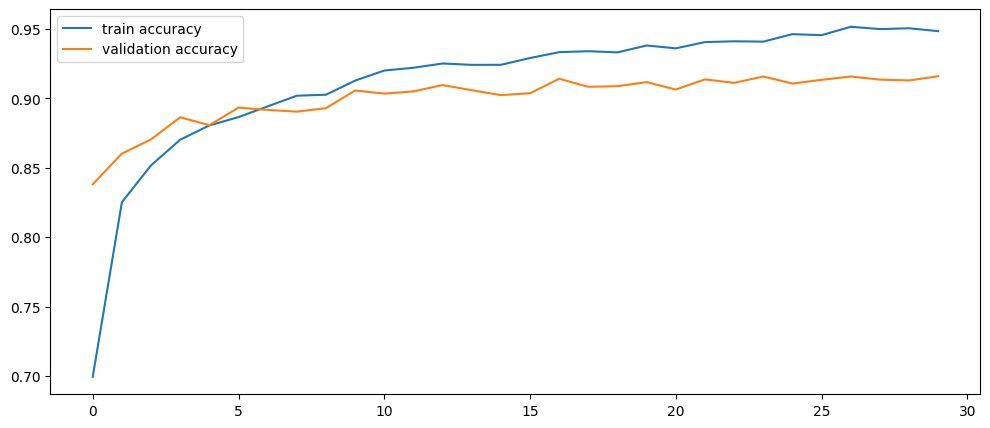

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(mod_res.history["accuracy"], label="train accuracy")
ax.plot(mod_res.history["val_accuracy"], label="validation accuracy")
ax.legend()

In [19]:
model.evaluate(x_test, y_test, verbose=0)


[0.4092801511287689, 0.9093999862670898]